## 1. Show me the Credit

- I am completing a (closed) kaggle competetion - show me the credit
- The competetion provided two data sets: a test set and and a training set




### 1.1 Importing packages
- I have imported packages I am **definately** using: Pandas(and numpy) to read and examine the data; matplotlib and seaborn to plot
- I also know that i'll be using knn to impute values and logistical regression to predict classes 

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import numpy as np


In [3]:

user_cols = ['dlq' , 'total_lines', 'age', 'past_30', 'debtratio', 
             'income', 'credit_lines', 'past_90', 'home_lines',
             'past_60', 'dep_count']
             

In the code block above, I created columns names to replace existing ones. 
###Variable Name:

SeriousDlqin2yrs

RevolvingUtilizationOfUnsecuredLines

age

NumberOfTime30-59DaysPastDueNotWorse

DebtRatio

MonthlyIncome

NumberOfOpenCreditLinesAndLoans

NumberOfTimes90DaysLate

NumberRealEstateLoansOrLines

NumberOfTime60-89DaysPastDueNotWorse

NumberOfDependents

###Description:

Person experienced 90 days past due delinquency or worse 

Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

Age of borrower in years

Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

Monthly debt payments, alimony,living costs divided by monthy gross income

Monthly income

Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

Number of times borrower has been 90 days or more past due.

Number of mortgage and real estate loans including home equity lines of credit

Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

Number of dependents in family excluding themselves (spouse, children etc.)


In [4]:
training = pd.read_table('cs-training.csv', sep=',', header=False,\
 names=user_cols)
#read file, changed index, changed names
 
test = pd.read_table('cs-test.csv', sep = ',', header=False,\
names=user_cols)


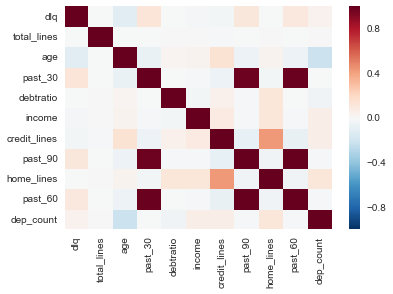

In [5]:
%matplotlib inline
sns.heatmap(training.corr())
#heatmap to gauge relationship betwwen features

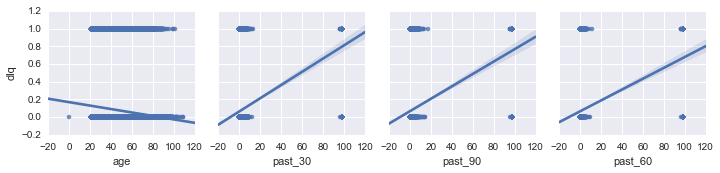

In [6]:
sns.pairplot(training, x_vars=['age', 'past_30', 'past_90',\
             'past_60'], y_vars='dlq', kind='reg')
#pairplot to visualize relationship between delinquency and other features

####How each feature relates to the response

In [8]:
training.isnull().sum()

dlq                 0
total_lines         0
age                 0
past_30             0
debtratio           0
income          29731
credit_lines        0
past_90             0
home_lines          0
past_60             0
dep_count        3924
dtype: int64

####Observations: 

    1) There is a lot of missing values, in income and dependent columns
    2) In the following lines of code, I will impute dependent count using sk-learn's imputer, and income using KNN Regressor
 

In [9]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=1)
training['dep_count'] = imp.fit_transform(training.dep_count).T


In [10]:
training.isnull().sum()

dlq                 0
total_lines         0
age                 0
past_30             0
debtratio           0
income          29731
credit_lines        0
past_90             0
home_lines          0
past_60             0
dep_count           0
dtype: int64

####Successfully imputed dependent counts
90826 entries with zero dependents. 

In [11]:
training_imp = training.dropna()  
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn import neighbors
yi = training_imp.income
Xi = training_imp[['total_lines', 'age', 'past_30', 'debtratio', 
             'credit_lines', 'past_90', 'home_lines',
             'past_60', 'dep_count']]

In [12]:
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, \
test_size=0.4, random_state=4)

In [13]:
    
knn = neighbors.KNeighborsRegressor(n_neighbors=5000, weights='uniform')
knn.fit(Xi_train, yi_train)
    

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_neighbors=5000, p=2, weights='uniform')

In [14]:
import numpy as np
def train_test_rmse(Xi, yi):
    Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, random_state=4)
    knn = neighbors.KNeighborsRegressor(n_neighbors=1000, weights='uniform')
    knn.fit(Xi_train, yi_train)
    yi_pred = knn.predict(Xi_test)
    return np.sqrt(metrics.mean_squared_error(yi_test, yi_pred))

Xi = training_imp[['total_lines', 'age', 'past_30', 'debtratio', 
             'credit_lines', 'past_90', 'home_lines',
             'past_60', 'dep_count']]
yi = training_imp.income
train_test_rmse(Xi, yi)

14454.895229600739

In [15]:
training_null = training[training.income.isnull() == True]

In [16]:
training_null.shape

(29731, 11)

In [17]:
y_null = training_null.income
X_null = training_null[['total_lines', 'age', 'past_30', 'debtratio', 
             'credit_lines', 'past_90', 'home_lines',
             'past_60', 'dep_count']]
knn = neighbors.KNeighborsRegressor(n_neighbors=1000, weights='uniform')
knn.fit(Xi_train, yi_train)
y_null_pred = knn.predict(X_null)



In [18]:
y_null = y_null_pred 


In [23]:
training_null.income = y_null

//anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


###The code above did the following:
    - Successfully imputed missing dependent counts using Sci-kit learn's impute function(although, that might have been redundant since it imputed 0 - the most frequent value)
    - Successfully imputed income using KNN Regressor.
    
    
###The objective of the code following this is to:
    - Run and evaluate a Logistical Regression on the now complete training set
    - impute missing values in the testing set
    - run LR in the training set. 
    

In [24]:
training_1 = pd.concat([training_imp, training_null])

In [25]:
logreg = LogisticRegression(C=1e9)

X = training_1[['total_lines', 'age', 'past_30', 'debtratio', 
             'credit_lines', 'past_90', 'income', 'home_lines',
             'past_60', 'dep_count']]
y = training_1.dlq


In [26]:
logreg.fit(X, y)
assorted_pred_class = logreg.predict(X)

###Imputing missing values in the testing set

In [27]:
test.isnull().sum()

dlq             101503
total_lines          0
age                  0
past_30              0
debtratio            0
income           20103
credit_lines         0
past_90              0
home_lines           0
past_60              0
dep_count         2626
dtype: int64

In [29]:
test['dep_count'] = imp.fit_transform(test.dep_count).T

In [30]:
test_null = test[test.income.isnull() == True]


In [31]:
test_imp = test.dropna()

(0, 11)